<a href="https://colab.research.google.com/github/pablex72/tensorflow-practices/blob/main/Regresion_en_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importaciones

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

Lectura de los datos


In [33]:
#
# Lectura y visualización del set de datos
#

datos = pd.read_csv('/content/dataset.csv', sep=",", skiprows=32, usecols=[2,3])

x = datos['Age'].values
y = datos['Systolic blood pressure'].values

datos


,Age,Systolic blood pressure
0,39,144
1,45,138
2,47,145
3,65,162
4,46,142
5,67,170
6,42,124
7,67,158
8,56,154
9,64,162


#
Construir el modelo en Keras
#

###### - Capa de entrada: 1 dato (cada dato "x" correspondiente a la edad)
###### - Capa de salida: 1 dato (cada dato "y" correspondiente a la regresión lineal)
- Activación: 'linear' (pues se está implementando la regresión lineal)

Uso de Sequential()

In [34]:
np.random.seed(2) # Para reproducibilidad del entrenamiento
modelo = Sequential()#es simplemente un contenedor, que bien podría ser 
#un modelo de Regresión Lineal o de Regresión Logística, una Red Neuronal o una Red Convolucional.

Uso de Dense()
###########Para definir cuál será el contenido de este modelo

In [35]:
#output_dim: especifica el tamaño de los datos de salida
#input_dim: se refiere al tamaño de los datos de entrada.
#activation: permite definir la función de activación a utilizar

# input: la edad y, al igual que en el caso anterior, tendrá una dimensión igual a 1.
input_dim = 1

# output : la dimensión será igual a 1 (por ser simplemente un dato numérico, y no un vector o una matriz o una imagen).
output_dim = 1

# activacion: comportamiento lineal o si lo usaremos para realizar, por ejemplo, una Regresión Logística o una Red Neuronal.
modelo.add(Dense(output_dim, input_dim = input_dim, activation = 'linear'))


Veamos ahora cómo definir el método que se usará para el entrenamiento del modelo.

aún no se ha especificado la forma como se calcularán los parámetros de la línea recta (w y b).

***usamos el módulo SGD***

In [36]:
# Stochastic Gradient Descent, y que como su nombre lo indica 
# permite especificar que el método de entrenamiento será precisamente el del Gradiente Descendente.
# La siguiente línea de código permite crear una instancia de SGD con una tasa de aprendizaje (lr) igual a 0.0004:
sgd = SGD(lr=0.0004)

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**Compile**
Una vez creado este objeto se debe enlazar con el modelo. Para ello se usa el método compile, en el cual se definirá adicionalmente la función de error (error cuadrático medio):

In [37]:
# error cuadrático medio (mean squared error, mse)
# optimizer=sgd permite especificar que el modelo hará uso del Gradiente Descendente para el entrenamiento.
modelo.compile(loss='mse', optimizer=sgd)

Uso de summary()


In [38]:
modelo.summary()
#Param #, que en este caso es igual a 2. Este valor corresponde a los dos parámetros (w y b)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


**Entrenamiento del modelo**
El entrenamiento se lleva a cabo con el método fit, el cual requiere al menos tres parámetros de entrada:

In [39]:
# epochs: el número de iteraciones que se usarán durante el entrenamiento (en este caso serán 40,000).
num_epochs = 40
# batch_size: define la cantidad de datos que se usarán en cada iteración del entrenamiento.
# En este caso se tienen tan solo 29 datos, que será precisamente el mismo batch_size a usar.
batch_size = x.shape[0]
# verbose: permite imprimir en pantalla los resultados del entrenamiento en cada iteración.
historia = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/40
1/1 [==============================] - 0s 245ms/step - loss: 9580.0381
Epoch 2/40
1/1 [==============================] - 0s 8ms/step - loss: 6686.4219
Epoch 3/40
1/1 [==============================] - 0s 8ms/step - loss: 4775.1060
Epoch 4/40
1/1 [==============================] - 0s 8ms/step - loss: 3512.6069
Epoch 5/40
1/1 [==============================] - 0s 8ms/step - loss: 2678.6616
Epoch 6/40
1/1 [==============================] - 0s 7ms/step - loss: 2127.7778
Epoch 7/40
1/1 [==============================] - 0s 7ms/step - loss: 1763.8595
Epoch 8/40
1/1 [==============================] - 0s 7ms/step - loss: 1523.4329
Epoch 9/40
1/1 [==============================] - 0s 7ms/step - loss: 1364.5750
Epoch 10/40
1/1 [==============================] - 0s 6ms/step - loss: 1259.5936
Epoch 11/40
1/1 [==============================] - 0s 7ms/step - loss: 1190.1982
Epoch 12/40
1/1 [==============================] - 0s 8ms/step - loss: 1144.3074
Epoch 13/40
1/1 [==================

Resultados
#
# Visualizar resultados del entrenamiento
#

In [46]:
# Los parámetros w y b calculados tras el entrenamiento, se pueden imprimir en pantalla usando el siguiente código:
capas = modelo.layers[0]
w, b = capas.get_weights()
print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 2.9, b = 0.4


# Graficar el error vs epochs y el resultado de la regresión
# superpuesto a los datos originales

1/1 [==============================] - 1s 536ms/step


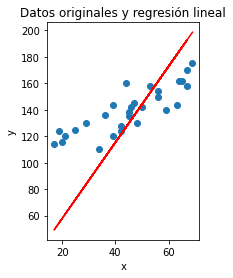

In [47]:
y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Datos originales y regresión lineal')
plt.show()

NameError: ignored

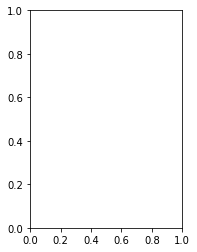

In [49]:
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.title('Datos originales y regresión lineal')
plt.show()

Predicción
Obtengamos el nivel de presión sanguínea para una persona de 90 años. Para ello usamos el método predict e introducimos la edad como un arreglo Numpy:

In [50]:
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)
print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

1/1 [==============================] - 0s 40ms/step
La presión sanguínea será de 259.0 mm-Hg  para una persona de 90 años
